In [91]:
from gbm import test_data_dir
from gbm.data import TTE
from gbm.binning.unbinned import bin_by_time
import matplotlib.pyplot as plt
from gbm.data import PosHist
from gbm.data import Trigdat
from gbm.time import Met

In [92]:
print('Considered GRB:')
GRB = ['GRB090820027','GRB090902462','GRB120624933','GRB130427324']
print(GRB)
init_tte=[]
for i in range(len(GRB)):
    GRB[i]=GRB[i].replace('GRB','')
    init_tte.append(TTE.open('bn'+GRB[i]+'/glg_tte_n0_bn'+GRB[i]+'_v00.fit'))

Considered GRB:
['GRB090820027', 'GRB090902462', 'GRB120624933', 'GRB130427324']


In [93]:
trig_dets=[]
for i in range (len(GRB)):  
    trigdat = Trigdat.open('bn'+GRB[i]+'/glg_trigdat_all_bn'+GRB[i]+'_v01.fit')
    trigdat.headers.keys()
    phaii = trigdat.to_ctime('n0')
    trig_dets.append(trigdat.triggered_detectors)
    print('During the GRB'+GRB[i]+',triggered detectors are:',trig_dets[i])

During the GRB090820027,triggered detectors are: ['n2', 'n5']
During the GRB090902462,triggered detectors are: ['n0', 'n9']
During the GRB120624933,triggered detectors are: ['n1', 'n9']
During the GRB130427324,triggered detectors are: ['n6', 'n9', 'na', 'nb']


In [94]:
poshist=[]
for i in range(len(GRB)):    
    daily_data=str(GRB[i])[0:6]
    poshist.append( PosHist.open('bn'+GRB[i]+'/glg_poshist_all_'+str(daily_data)+'_v00.fit') )

In [95]:
#Check on the angular distance between the GRB position and the 
#detector pointing. Are selected only detector whose ang_dis<60 deg
import numpy as np

with open('source_localization.txt','r') as f:
    print(f.read())
f.close()

# read the file into a list of lines
with open('source_localization.txt','r') as f:
    lines = f.read().split("\n")

data=np.genfromtxt('source_localization.txt')

GRB_ra=[]
GRB_dec=[]

for i in range (len(GRB)):
    word = GRB[i] # dummy word. you take it from input
    d=-1
    # iterate over lines, and print out line numbers which contain
    # the word of interest.
    for i,line in enumerate(lines):
        d=d+1
        if word in line: # or word in line.split() to search for full words
            c=d
    GRB_ra.append(data[c,1])
    GRB_dec.append(data[c,2])
    print('Ra and Dec position of the burst '+word+':',str(data[c,1]),',',str(data[c,2]))

GRB          Ra   Dec
bn090820027 87.7 27.7
bn090902462 264.9 27.3
bn120624933 170.9 8.9
bn130427324 173.1 27.7

Ra and Dec position of the burst 090820027: 87.7 , 27.7
Ra and Dec position of the burst 090902462: 264.9 , 27.3
Ra and Dec position of the burst 120624933: 170.9 , 8.9
Ra and Dec position of the burst 130427324: 173.1 , 27.7


In [96]:
checked_detectors=[]
for j in range(len(GRB)): 
    print('Consider GRB'+GRB[j]+':')
    detection_angle=np.zeros(len(trig_dets[j]))
    check=[]
    temp=trig_dets[j]
    for det in range (len(trig_dets[j])):
        detection_angle[det]=poshist[j].detector_angle(GRB_ra[j],GRB_dec[j],temp[det],init_tte[j].trigtime)
        print(temp[det],'angular distance to the src is',detection_angle[det])
        if(detection_angle[det]<60):
            check.append(temp[det])
    print('Triggered detectors that see the GRB with an angular distance <60 deg are:')
    print(check)
    print()
    checked_detectors.append(check)

Consider GRB090820027:
n2 angular distance to the src is 18.07123746452789
n5 angular distance to the src is 50.13007988549669
Triggered detectors that see the GRB with an angular distance <60 deg are:
['n2', 'n5']

Consider GRB090902462:
n0 angular distance to the src is 36.00536676766325
n9 angular distance to the src is 38.62182334507432
Triggered detectors that see the GRB with an angular distance <60 deg are:
['n0', 'n9']

Consider GRB120624933:
n1 angular distance to the src is 36.87207952187479
n9 angular distance to the src is 50.72764172123739
Triggered detectors that see the GRB with an angular distance <60 deg are:
['n1', 'n9']

Consider GRB130427324:
n6 angular distance to the src is 53.27605988848988
n9 angular distance to the src is 6.447830505303378
na angular distance to the src is 43.15568769905921
nb angular distance to the src is 66.69220582384455
Triggered detectors that see the GRB with an angular distance <60 deg are:
['n6', 'n9', 'na']



In [97]:
# open TTEs file as a list to merge at the end for each GRB
#Detectors selected are those who triggered the burst and see it with
#an angular distanc <60 deg
tte_merge=[]

for j in range (len(GRB)):
    print('Consider GRB'+GRB[j]+':')
    tte_temp=[]
    temp=checked_detectors[j]
    for det in range (len(checked_detectors[j])):
        print('reading file:','bn'+GRB[j]+'/glg_tte_'+str(temp[det])+'_bn'+str(GRB[j])+'_v00.fit')
        n_i=TTE.open('bn'+str(GRB[j])+'/glg_tte_'+str(temp[det])+'_bn'+str(GRB[j])+'_v00.fit')
        tte_temp.append(n_i)
    tte_merge.append(tte_temp)
    print()

Consider GRB090820027:
reading file: bn090820027/glg_tte_n2_bn090820027_v00.fit
reading file: bn090820027/glg_tte_n5_bn090820027_v00.fit

Consider GRB090902462:
reading file: bn090902462/glg_tte_n0_bn090902462_v00.fit
reading file: bn090902462/glg_tte_n9_bn090902462_v00.fit

Consider GRB120624933:
reading file: bn120624933/glg_tte_n1_bn120624933_v00.fit
reading file: bn120624933/glg_tte_n9_bn120624933_v00.fit

Consider GRB130427324:
reading file: bn130427324/glg_tte_n6_bn130427324_v00.fit
reading file: bn130427324/glg_tte_n9_bn130427324_v00.fit
reading file: bn130427324/glg_tte_na_bn130427324_v00.fit



In [98]:
# print the metadata in the PRIMARY header
tte=[]
for j in range(len(GRB)):
    print('Merging detectors for GRB'+GRB[j])
    tte.append(TTE.merge(tte_merge[j], force_unique=True))
    #tte.headers['PRIMARY']

Merging detectors for GRB090820027
Merging detectors for GRB090902462
Merging detectors for GRB120624933
Merging detectors for GRB130427324


In [99]:
data_obs_met=np.zeros(len(GRB))
for burst in range(len(GRB)):
    s=str(tte[burst].headers['PRIMARY'])
    start='DATE-OBS'
    end='Date of start of observation'
    s=(s.split(start))[1].split(end)[0]
    import re
    last_num=re.findall(r'\d+', s)[-1]
    temp=re.findall(r'^\D*(\d+)',s)
    first_num=temp[0]
    start=str(first_num)
    end=str(last_num)
    s=(s.split(start))[1].split(end)[0]
    data_obs=start+s+end
    met=Met.from_iso(str(data_obs))
    data_obs_met[burst]=met.met

In [100]:
GRB_trig_time=np.zeros(len(GRB))
BKG_start_time=np.zeros(len(GRB))
for burst in range(len(GRB)):
    GRB_trig_time[burst]=int(tte[burst].trigtime-data_obs_met[burst])
    BKG_start_time[burst]=int(tte[burst].trigtime-data_obs_met[burst]+tte[burst].time_range[0])
print(GRB_trig_time)
print(BKG_start_time)

[ 28.  27.  29. 136.]
[0. 0. 0. 0.]


In [101]:
phaii=[]
for burst in range(len(GRB)):
    # bin to 1.024 s resolution, reference time is trigger time
    phaii.append( tte[burst].to_phaii(bin_by_time, 1.024, time_ref=0.0) )

In [102]:
#Producing the Light curve
from gbm.plot import Lightcurve, Spectrum
#Selecting Energy range and time interval of the light curve
erange = (50.0, 300.0)
lc_data=[]

time_split=np.zeros((4,2))

for burst in range(len(GRB)):
    
    time_split [burst,0] = - GRB_trig_time[burst]
    if (time_split [burst,0] < -30):
        time_split [burst,0] = -30
    time_split [burst,1] = 150
    temp=np.zeros(2)
    temp[0]=time_split [burst,0]
    temp[1]=time_split [burst,1]
    lc_data.append ( phaii[burst].to_lightcurve(time_range=temp,energy_range=erange) )
    
print(time_split)

[[-28. 150.]
 [-27. 150.]
 [-29. 150.]
 [-30. 150.]]


In [103]:
#BKG extimation, selecting the BKG intervals
bkgd_times=[]
for burst in range (len(GRB)):
    bkgd_times.append([ (time_split[burst,0],BKG_start_time[burst]-5), (BKG_start_time[burst]+50,time_split[burst,1])])
print(bkgd_times)

[[(-28.0, -5.0), (50.0, 150.0)], [(-27.0, -5.0), (50.0, 150.0)], [(-29.0, -5.0), (50.0, 150.0)], [(-30.0, -5.0), (50.0, 150.0)]]


In [104]:
# the background fitter interface
from gbm.background import BackgroundFitter
# GBM fitting algorithm
from gbm.background.binned import Polynomial
# we initialize our background fitter with the phaii object, the algorithm, and the time ranges to fit.
# if we were using an unbinned algorithm, we'd call .from_tte() and give it tte instead of phaii

backfitter=[]
for burst in range(len(GRB)):
    backfitter.append( BackgroundFitter.from_phaii(phaii[burst], Polynomial, time_ranges=bkgd_times[burst]) )

In [105]:
# and once initialized, we can run the fit with the fitting parameters appropriate for our algorithm.
# here, we'll do a 2st order polynomial

bkgd=[]
for burst in range(len(GRB)):
    backfitter[burst].fit(order=1)
    #backfitter.statistic/backfitter.dof
    bkgd.append (backfitter[burst].interpolate_bins(phaii[burst].data.tstart, phaii[burst].data.tstop))

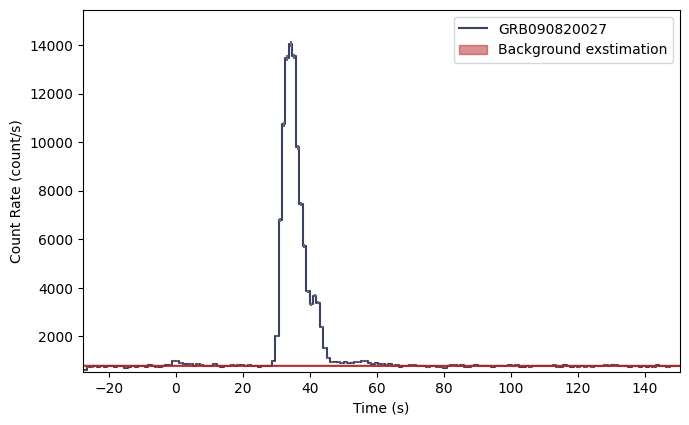

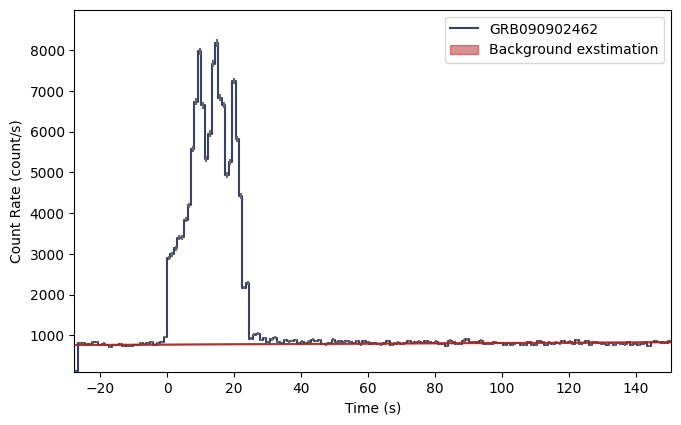

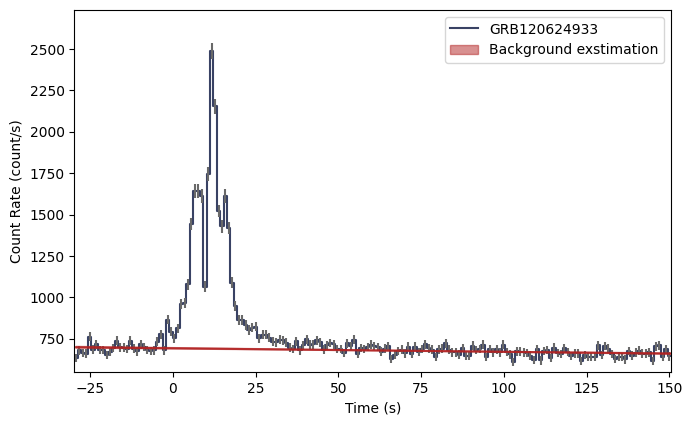

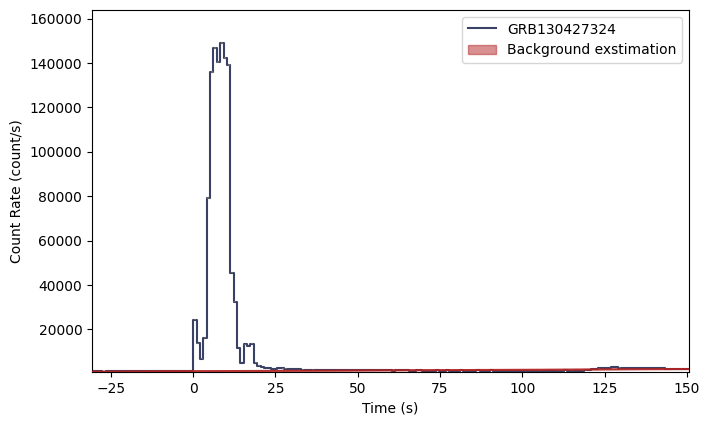

In [106]:
lc_bkgd=[]
lcplot=[]
for burst in range(len(GRB)):
    lc_bkgd.append(0)
    lcplot.append(0)
    lc_bkgd[burst] = bkgd[burst].integrate_energy(*erange)
    lcplot[burst] = Lightcurve(data=lc_data[burst], background=lc_bkgd[burst])
    plt.legend(['GRB'+GRB[burst],'Background exstimation'])
    plt.show()

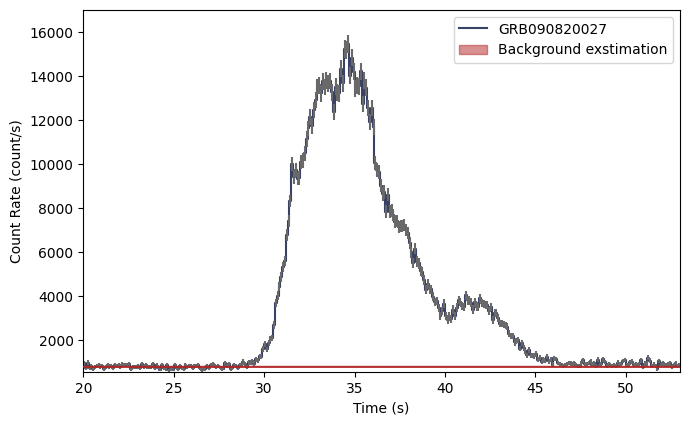

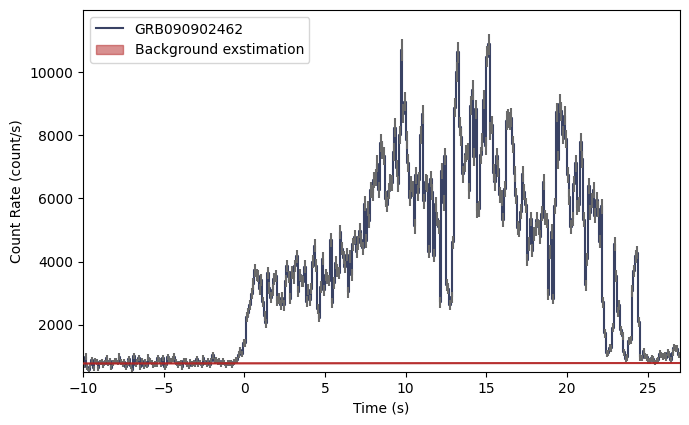

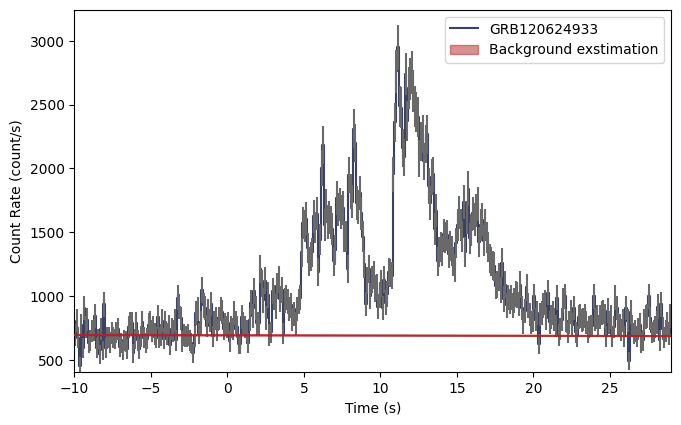

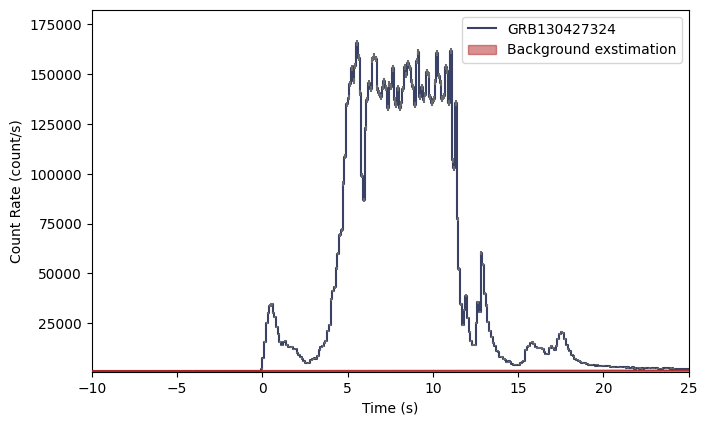

In [107]:
# bin to 0.1 s resolution, reference time is trigger time
phaii=[]
for burst in range(len(GRB)):
    # bin to 0.1 s resolution, reference time is trigger time
    phaii.append( tte[burst].to_phaii(bin_by_time, 0.1, time_ref=0.0) )
#Producing the Light curve
from gbm.plot import Lightcurve, Spectrum
#Selecting Energy range and time interval of the light curve
erange = (50.0, 300.0)
lc_data=[]
lc_plot=[]
#Selecting a new time interval to plot the lc
time_split=np.zeros((4,2))
temp=np.zeros(2)
for burst in range(len(GRB)):
    if (burst==0):
        time_split[burst,0]= BKG_start_time[burst]+20
        time_split[burst,1]=GRB_trig_time[burst]+25
        
    if(burst>0):
        time_split[burst,0]= BKG_start_time[burst]-10
        time_split[burst,1]=GRB_trig_time[burst]
        if (time_split[burst,1]>50):
            time_split[burst,1]=25
    temp[0]=time_split[burst,0]
    temp[1]=time_split[burst,1]
    lc_data.append(phaii[burst].to_lightcurve(time_range=temp,energy_range=erange))
    lc_plot.append(0)
    lc_plot[burst]=Lightcurve(data=lc_data[burst],background=lc_bkgd[burst])
    plt.legend(['GRB'+GRB[burst],'Background exstimation'])

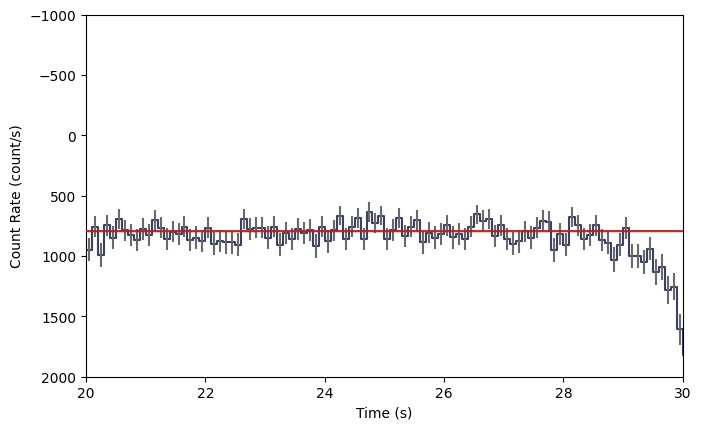

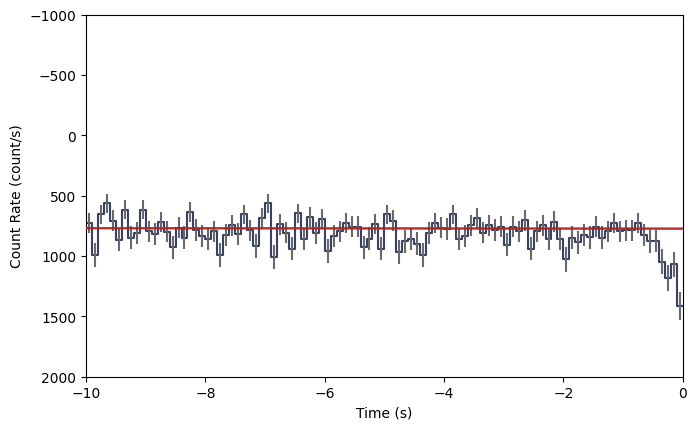

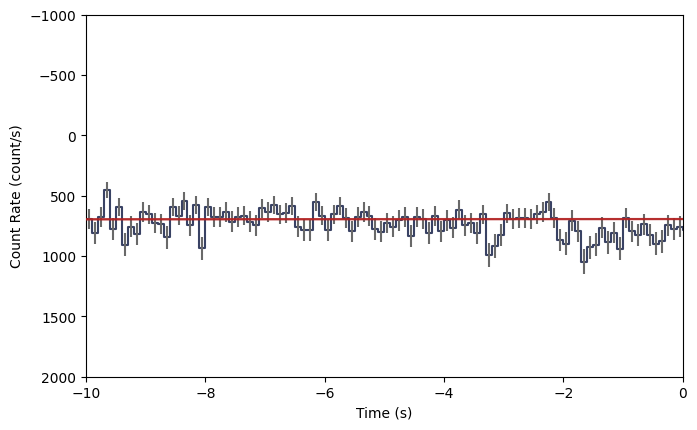

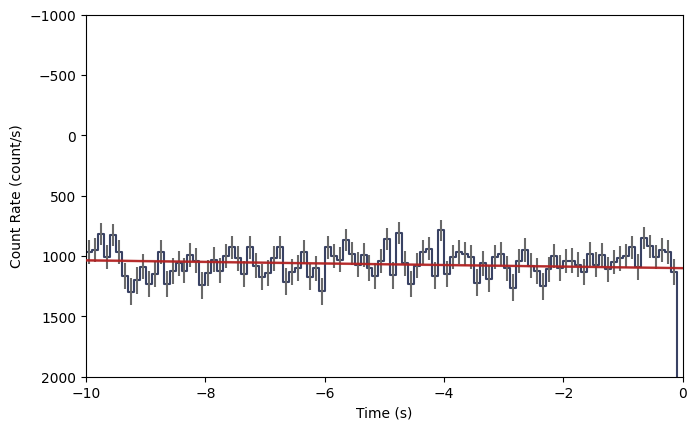

In [108]:
#BKG zooming
for burst in range(len(GRB)):
    
    lc_data.append(phaii[burst].to_lightcurve(time_range=temp,energy_range=erange))
    lc_plot.append(0)
    lc_plot[burst]=Lightcurve(data=lc_data[burst],background=lc_bkgd[burst])
    if(burst==0):
        plt.axis([20,30,2000,-1000])
    if(burst>0):
        plt.axis([-10,0,2000,-1000])
    plt.show()